<a href="https://colab.research.google.com/github/Luis20matias/Projetos_Data_Science/blob/main/Project_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for Marketing Strategy
---

Customer segmentation creates groups with people with the same characteristics. This is a better way to understand the needs and preferences of each customer, so this information is useful to better target those needs and preferences in order to increase the revenue of some companies. 

According to [Hitachi Solutions](https://global.hitachi-solutions.com/blog/customer-segmentation-in-banking), the customer segmentation, taken on its own, isn’t enough. In order to see tangible results from your commercial or retail banking customer segmentation strategy, it needs to be effective.

This project delves into some features of a lot of clients in a bank. The dataset is taken from Kaggle:  [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata/metadata).



> The main challenge is: **“Develop a customer segmentation to define marketing strategy”**

---

<p align="center">
  <img src="https://drive.google.com/uc?id=1JJXryVpKxYCOuev5fH5DXmpQY8qdyq9e"   width="500">
</p>
<p align="center">
<a href="http://www.freepik.com">Designed by vectorjuice / Freepik</a>
</p>


## Overview of the dataset
---

This is a data set created by Arjun Bhasin. The dataset can be found at the site of Kaggle: [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata/metadata). 

You find some important information on the site about the data for you to understand the problem. 



### Dictionary of the dataset

* **CUSTID:** Identification of Credit Card holder (Categorical)

* **BALANCE:** Balance amount left in their account to make purchases

* **BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

* **PURCHASES:** Amount of purchases made from account

* **ONEOFF_PURCHASES:** Maximum purchase amount done in one-go

* **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment

* **CASH_ADVANCE:** Cash in advance given by the user

* **PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

* **ONEOFFPURCHASES_FREQUENCY:** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

* **PURCHASES_INSTALLMENTS_FREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

* **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid

* **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advanced"

* **PURCHASES_TRX:** Numbe of purchase transactions made

* **CREDIT_LIMIT:** Limit of Credit Card for user

* **PAYMENTS:** Amount of Payment done by a user

* **MINIMUM_PAYMENTS:** The minimum amount of payments made by a user

* **PRC_FULL_PAYMENT:** Percent of full payment paid by a user

* **TENURE:** Tenure of credit card service for user

<br />

---

# Objective
---


* This project aims to be able to make an analysis of the dataset and develop a customer segmentation to define marketing strategy using techniques of unsupervised learning.

---





# Notebook
---

The following code is divided into five parts that are listed below.


## Check list

1.   Import the libraries and the dataset.
2.   First preprocessing and visualization of the dataset.
3.   Building the first models.
4.   PCA.
5.   Autoencoder.
6.   Conclusions of the project.
7.   Author.



## Abstract of the project

### **1. Import the libraries and the dataset.**

In this first part, it is imported the libraries and frameworks that are used during this project. Also, it is displayed the data and some characteristics of it, like the number of samples and features, if exist null or NaN values in the dataset, and counts the unique values for each feature.

### **2. First preprocessing and visualization of the dataset.**

In the second part, some graphics are made to visualize the dataset for some insights about the problem, for example, the correlation between the features. Besides, some features that aren't necessary are withdrawn.

### **3. Building the first models.**

In the third part, it is applied the Elbow Method to find the number of clusters in the dataset. After that, it is used the K-means to build the clusters and take some important insights of each group. In the end, is created a CSV file to send to the RH in the company.  

### **4. PCA.**

Here is implemented the Principal Component Analysis (PCA). After applying this technique is plotted graphics that is possible to see the division of the groups in the dataset.

### **5. Autoencoder.**

n this part of the project, is applied the Autoencoder model. It takes the data after the encoding process and applies the elbow method to build the K-means. Finally, is applied the PCA to see the graphics of the groups made and analyze some characteristics of each group.

### **6. Conclusions of the project.**

This final part shows a summary of the results that are achieved in each part of the project.

### **7. Author.**

Here is shown the name of the projetist.

---

# **Part 1: Import the libraries and the dataset**

In [ ]:
! pip install scikit-plot
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf


# Images
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt # pip install scikit-plot
import plotly.express as px # interactive images
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")

In [ ]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_marketing/CC_GENERAL.csv')

In [ ]:
creditcard_df.shape

(8950, 18)

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA



* **It's possible to see above that:**
  * **There are few null values in CREDIT_LIMIT and MINIMUM_PAYMENTS.**
  * **The type of each feature.**



In [ ]:
creditcard_df.describe() # just for numerical attributes

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


> **Searching for the client with the highest one-off purchase**

In [ ]:
creditcard_df[ creditcard_df['ONEOFF_PURCHASES'] == 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


> **Searching for the client with the highest Cash Advance**

In [ ]:
cash_advance_max = creditcard_df['CASH_ADVANCE'].max()
creditcard_df[ creditcard_df['CASH_ADVANCE'] == cash_advance_max	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# **Part 2: First data preprocessing and visualization of the data**

> **See the null samples in the dataset**

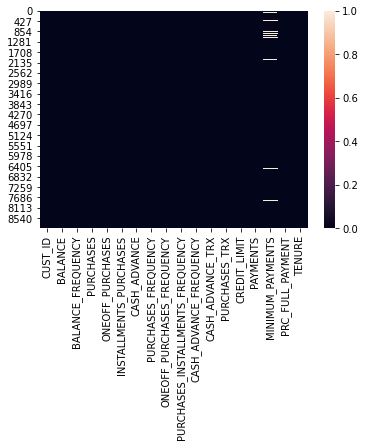

In [ ]:
sns.heatmap(creditcard_df.isnull());

* **There are some null point the feature MINIMUM_PAYMENTS**



> **Counting the null values for each feature**

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

> **Filling the null values with the mean.**

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

* **The null values were filled**

> **Checking if there exist duplicate samples**

In [ ]:
creditcard_df.duplicated().sum()

0

* **There aren't duplicate samples.**

> **Dropping the ID column of each client, because it is not necessary for this situation**

In [ ]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

> **Seeing the distribution of each feature**

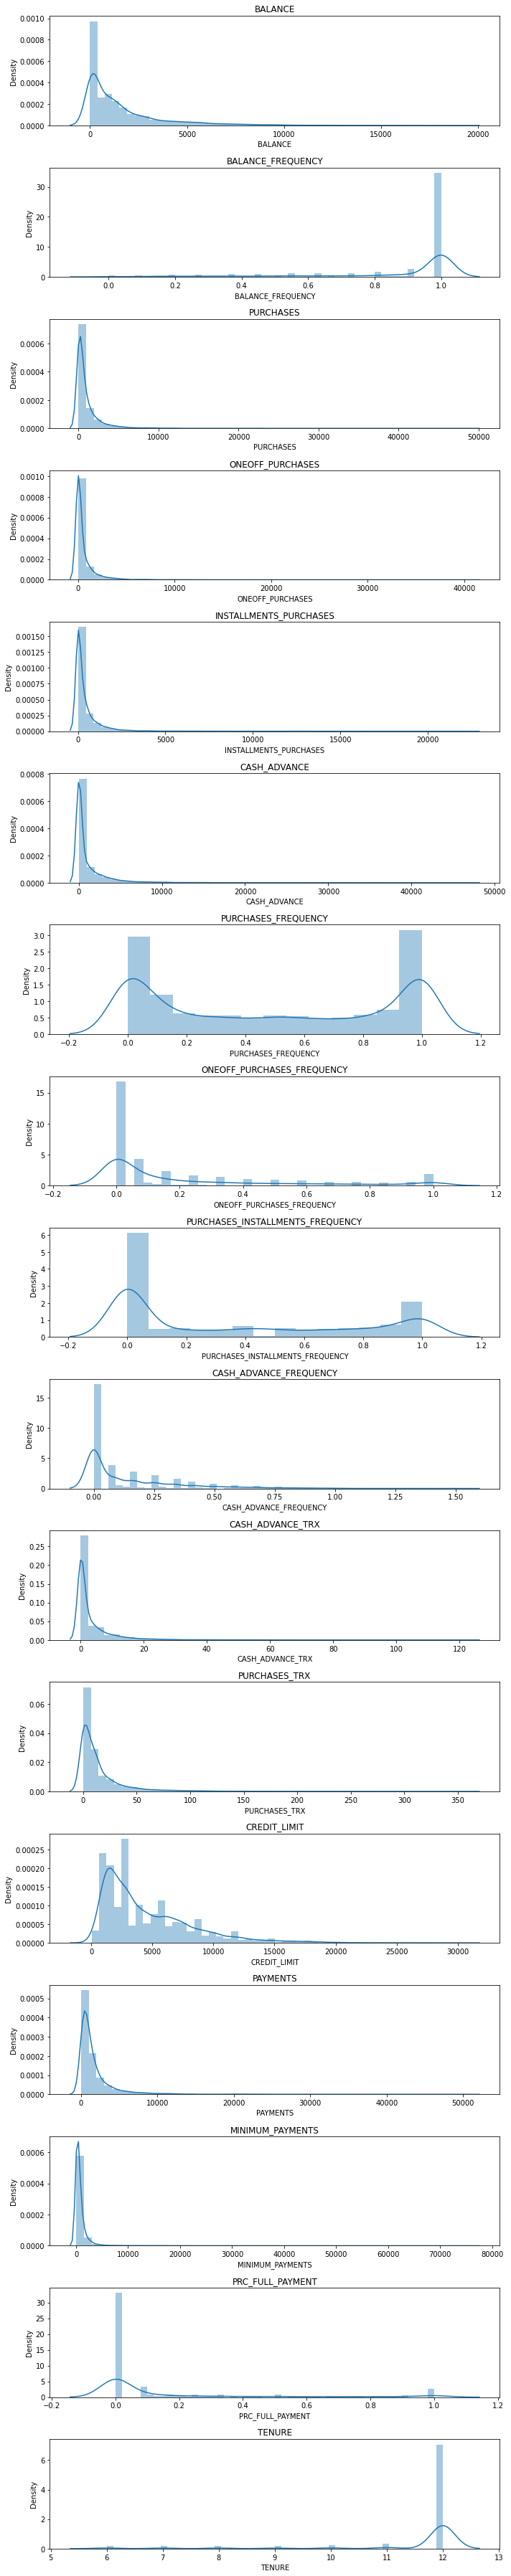

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1) # number of rows and columns + ID of each graphic
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True) # selection each feature
  plt.title(creditcard_df.columns[i])
plt.tight_layout(); # Automatically adjust subplot parameters to give specified padding.

---
* **It is possible to notice two groups of clients in the graphic PURCHASES_FREQUENCY because many clients use a lot of the cred card and others that don't.**
* **Just a few customers pay their invoices in full according to the figure PRC_FULL_PAYMENT**
---
<br>

> **Correlation between the features**


* **Computing the pairwise correlation of columns to prove if the insights above are real or not.**

* **Informations about correlations(r):**

  * Correlation is a statistic that measures the degree to which two variables move in relation to each other.
  * The correlation is closer to +1 the more the data are related.
  * Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa

* **Strength of Relationship**

* r < 0.3 ------------> None or very weak
* 0.3 < r < 0.5 ----> Weak
* 0.5 < r < 0.7 ----> Moderate 
* r > 0.7 -------------> Strong

* **The correlation can be seen in the pandas profiling too. Below it's plotting a heatmap with data value in each cell.**


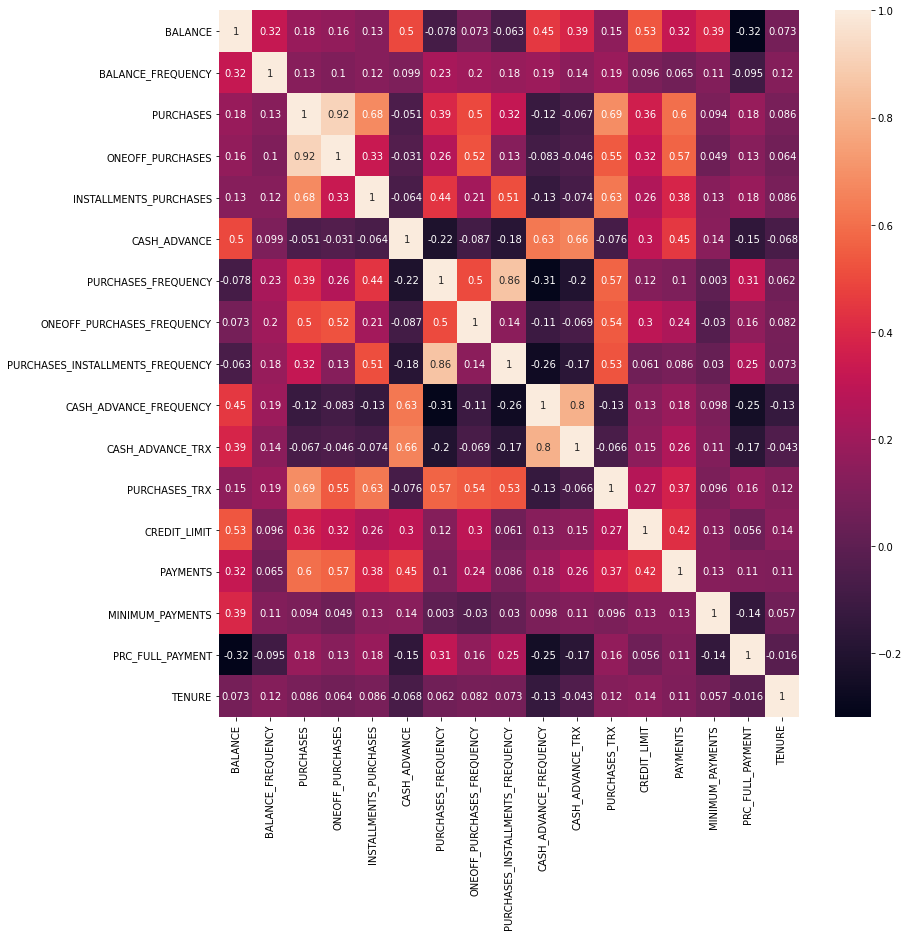

In [ ]:
correlations = creditcard_df.corr()

f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlations, annot = True);

---
* **Strong correlations found on the heatmap:**
  * **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY** (r = 0.86)
  * **PURCHASES** and **ONNOFF_PURCHASES** (r = 0.92)
  * **CASH_ADVANCE_FREQUENCY** and **CASH_ADVANCE_TRX** (r = 0.8)  

* **Negative correlations with the feature PRC_FULL_PAYMENT:**
  * **PRC_FULL_PAYMENT** and **BALANCE** (r = -0.32).
  * **PRC_FULL_PAYMENT** and **CASH_ADVANCE_TRX** (r = -0.25).

Here is possible to see that as much someone spend their money, less will be their balance amount and number of transactions made with "cash in advanced".


* **Negative correlations with the feature CASH_ADVACE_FREQUENCY:**
  * **CASH_ADVACE_FREQUENCY** and **PURCHASES_FREQUENCY** (r = -0.31).

It means that someone that requests a lot of cash advance has more debt with the bank, so they can't spend a lot of money buying other things.

---
<br>

# **Part 3: Building the first model**

## **Elbow Method for Kmeans**

* **Define the number of clusters.**

In [ ]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

> **Standardize features by removing the mean and scaling to unit variance**

* **It returns ndarray array of shape (n_samples, n_features_new) according to the [scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).**

* **WCSS: Within​-Cluster Sum of Squares.**

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df) 

In [ ]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

> **About [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

* **k-means++** is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. It speeds up convergence.

* **Attributes:**
  * **labels_**: Labels of each point

  * **inertia_**: Sum of squared distances (WCSS) of samples to their closest cluster center



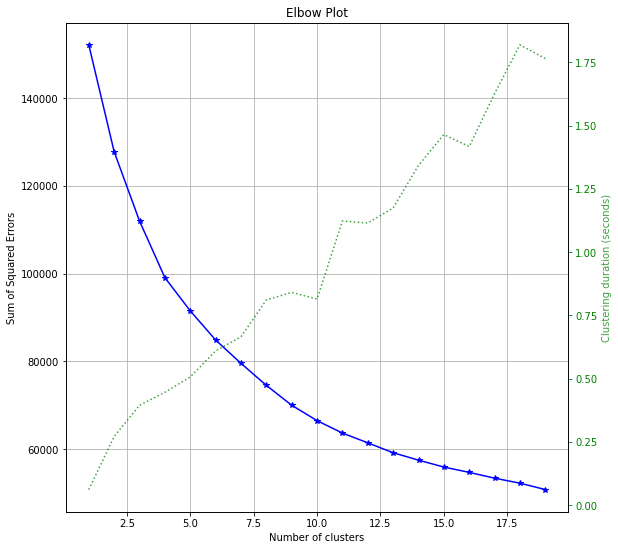

In [ ]:
kmeans = KMeans(init='k-means++', random_state = 1)
skplt.cluster.plot_elbow_curve(kmeans, X = creditcard_df_scaled, cluster_ranges=range(1, 20), figsize = (9,9));

## **K-means clustering**

* **The best number of clusters according to the figure above is 6. For this reason, it will be calculated Kmeans with six groups.**

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
np.unique(labels, return_counts= True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([3039, 2229, 1310, 1318,   86,  968]))

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns],)
cluster_centers # it gives the means of each cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.014910,0.371807,-0.344764,-0.223263,-0.404916,-0.084641,-0.824566,-0.334425,-0.769448,0.129263,-0.029904,-0.470030,-0.335880,-0.262438,-0.031203,-0.450963,-0.008146
1,-0.395777,0.308323,-0.066049,-0.244763,0.293466,-0.365747,0.967195,-0.375698,1.142424,-0.462692,-0.357711,0.125082,-0.327652,-0.249107,-0.055143,0.341075,-0.025166
2,-0.697825,-2.121466,-0.312918,-0.231058,-0.315296,-0.306912,-0.559277,-0.418961,-0.464264,-0.484403,-0.357813,-0.425470,-0.208910,-0.220974,-0.256026,0.261788,-0.164840
3,0.135412,0.427530,0.922587,0.875142,0.573623,-0.310041,1.086749,1.844224,0.537598,-0.406563,-0.319951,1.179361,0.687823,0.371797,-0.026965,0.437184,0.270897
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
5,1.593049,0.377248,-0.209263,-0.151315,-0.216897,1.942082,-0.456216,-0.189068,-0.412127,1.891066,1.840954,-0.251326,0.962875,0.767242,0.512394,-0.391972,-0.090907


* **Now is done the inverse transform of the standard scaler to be easier the visualization of the features.**

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [ ]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers # it gives the means of each cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1533.440325,0.965348,266.610507,221.866670,44.906680,801.374386,0.159412,0.102692,0.058639,0.161011,3.044752,3.026654,3272.381266,973.411678,791.488373,0.021816,11.506417
1,740.698491,0.950310,862.090309,186.180260,676.444913,211.883295,0.878533,0.090380,0.818466,0.042555,0.807710,17.818915,3302.317437,1012.004786,735.699171,0.253473,11.483640
2,112.010683,0.374715,334.650862,208.928002,125.949252,335.263311,0.265886,0.077474,0.179927,0.038210,0.807018,4.134249,3734.350796,1093.446581,267.549557,0.230283,11.296720
3,1846.324496,0.978549,2974.326221,2044.994388,929.788106,328.701214,0.926515,0.752626,0.578093,0.053787,1.065399,44.024335,6997.032147,2809.460456,801.364979,0.281583,11.879848
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
5,4880.272348,0.966637,556.110961,341.286033,214.929959,5051.507613,0.307249,0.146055,0.200648,0.513566,15.811983,8.462810,7997.783621,3954.234520,2058.320218,0.039069,11.395661


---
* **Group 4: VIP or Premium**
  * **This is a group of clients that has the highest credit limit: 15581.496801.**
  * **Besides, it has the highest Percent of full payment paid by users: 39.4721 %. The means of the PRC_FULL_PAYMENT from the dataset is 15.3715 %.**
  * **The bank should increase the limit card and incentive the habit of shopping for this group of clients.**
  


* **Group 2: Careful users**
  * **This group has the lowest balance amount left in their account to make a purchase: 112.010683.**
  * **The PRC_FULL_PAYMENT is 23.0283 % which is higher than the dataset that is 15.3715 %.**
  * **Probably this group keeps their money invested somewhere.**
  * **The bank should open offers to these clients to invest their money using the bank as an investment broker.** 


* **Group 5: More profitable for the bank**
  * **This is a group that has the higher Cash in advance given by the user: 5051.507613.**
  * **This is a group more profitable because the bank because the bank profits a lot from the interest from the advance.**
  * **They have a balance of 4880.272348	in their account.**
  * **This group has a low PURCHASE_FREQUENCY: 30.7249 %.**
  * **They have the lower percent of full payment paid by users (3.9069 %), due to this it is a risk group for the bank because they didn't pay often their debts.**
  * **This is the group that most people use their CASH_ADVANCE_FREQUENCY: 51.3566 %.**
  * **Due to growing debts and little money, they may not have enough money to pay off the debts.**


---
<br>

* **Adding the number of the group for each user.**

In [ ]:
labels, len(labels)

(array([0, 5, 3, ..., 1, 0, 0], dtype=int32), 8950)

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


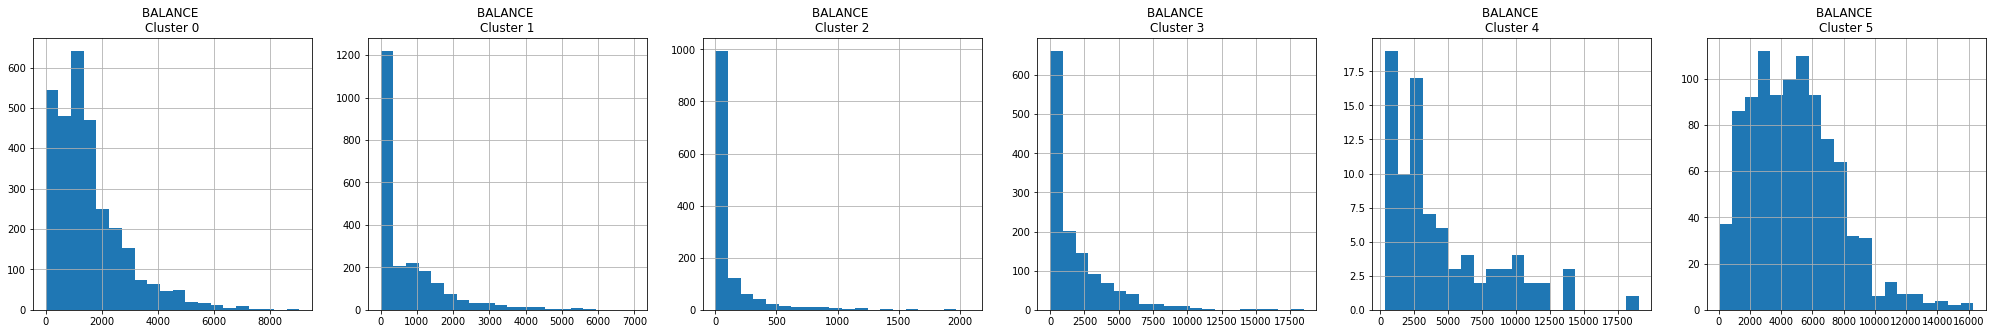

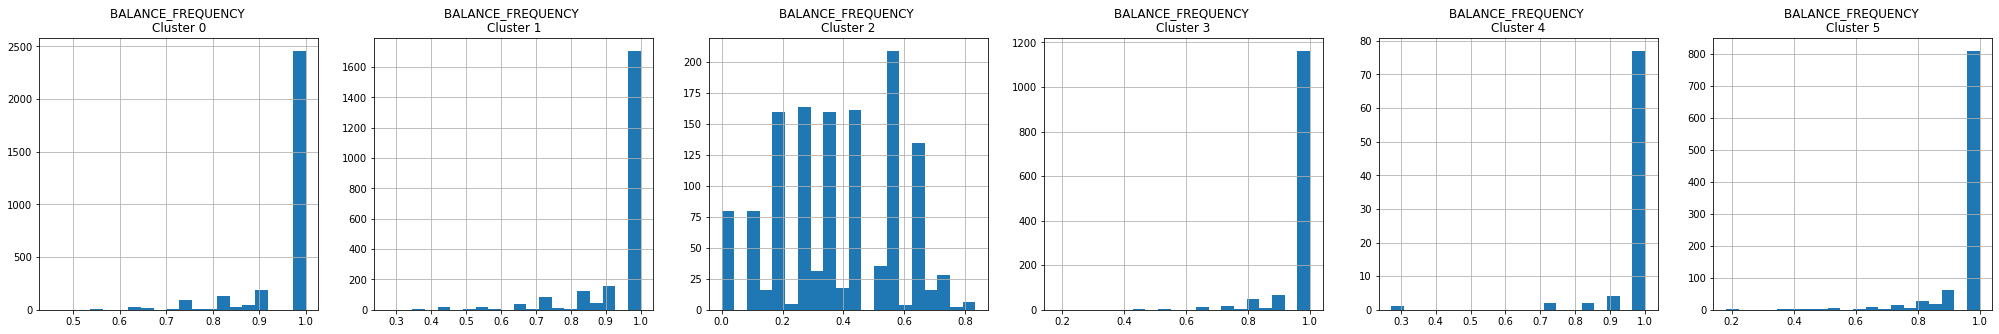

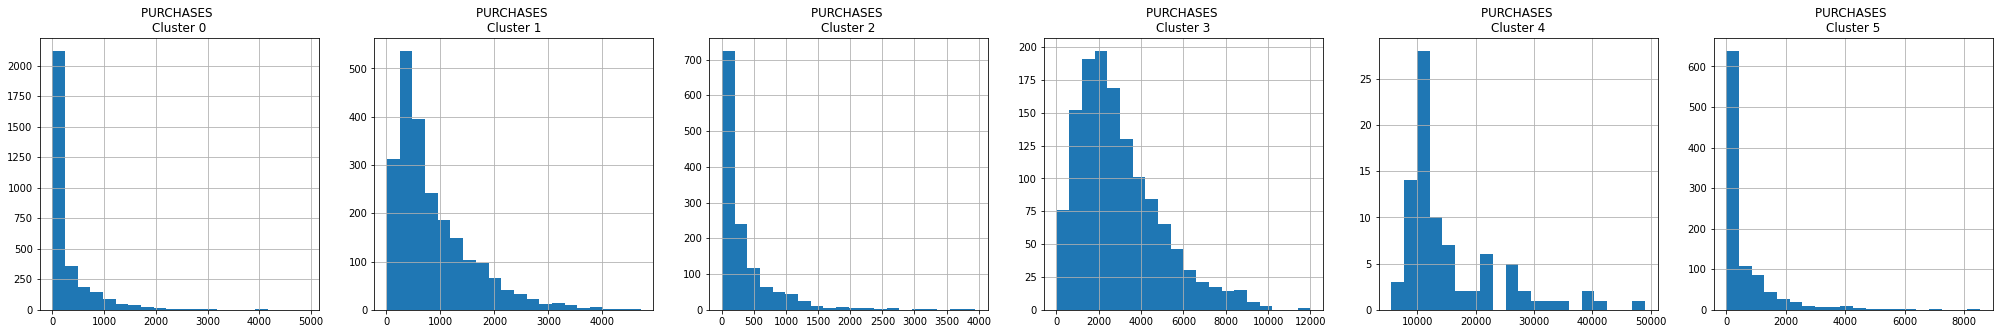

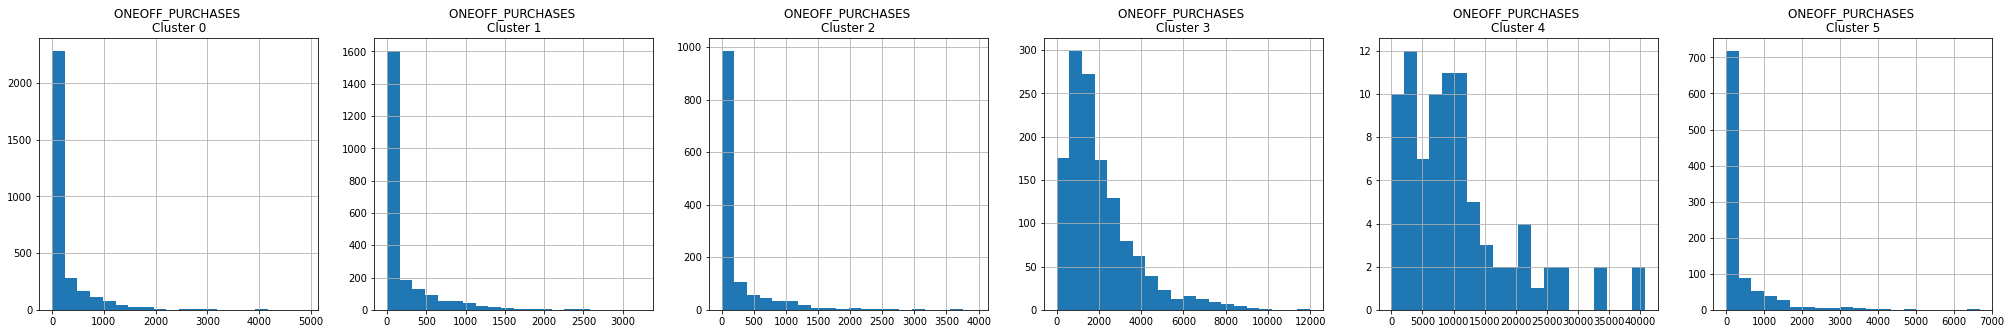

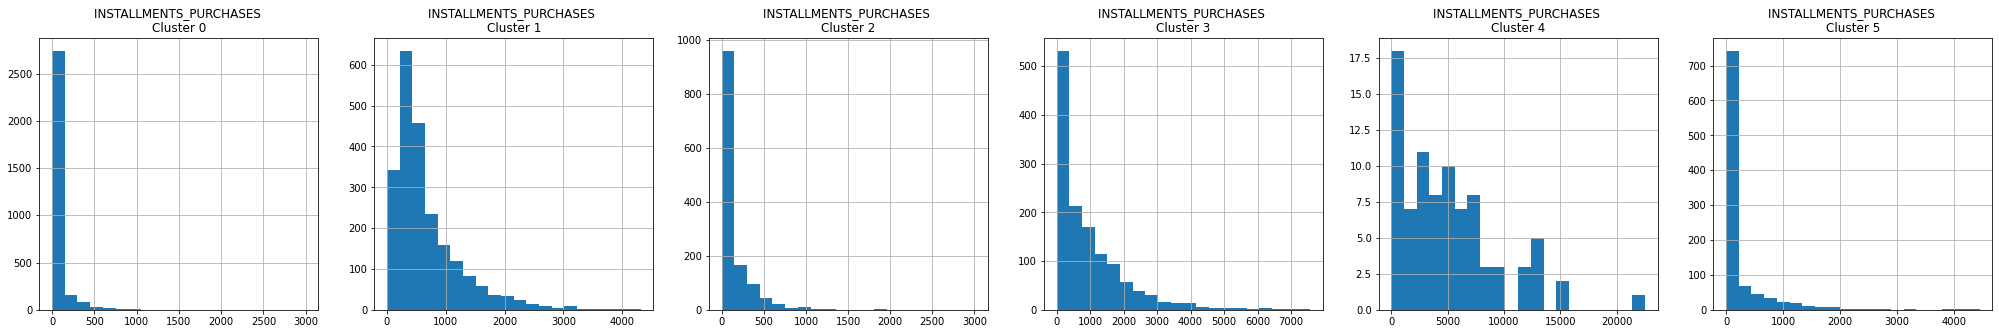

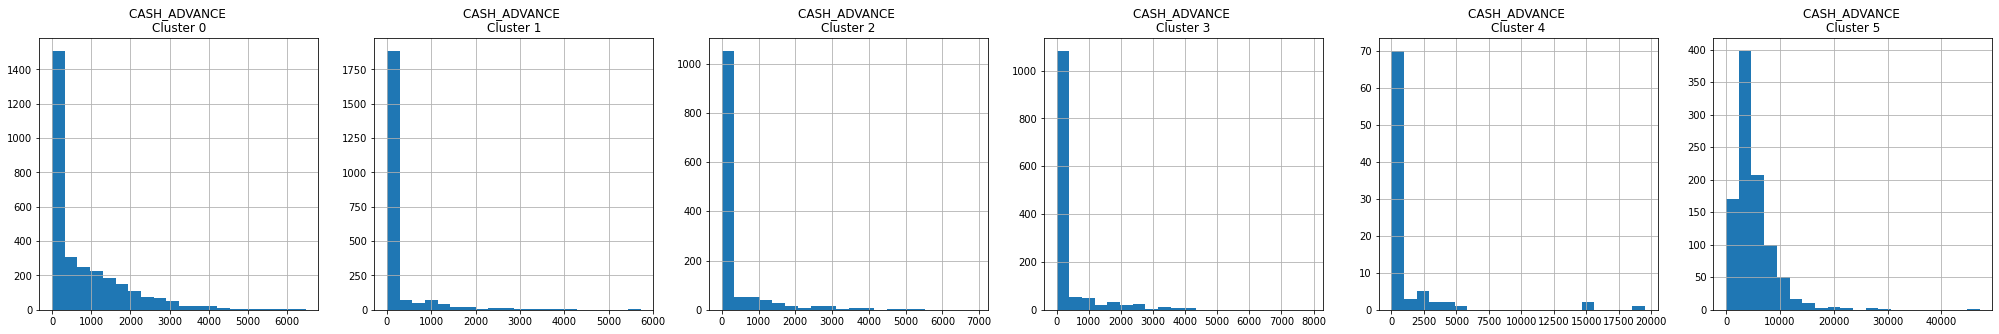

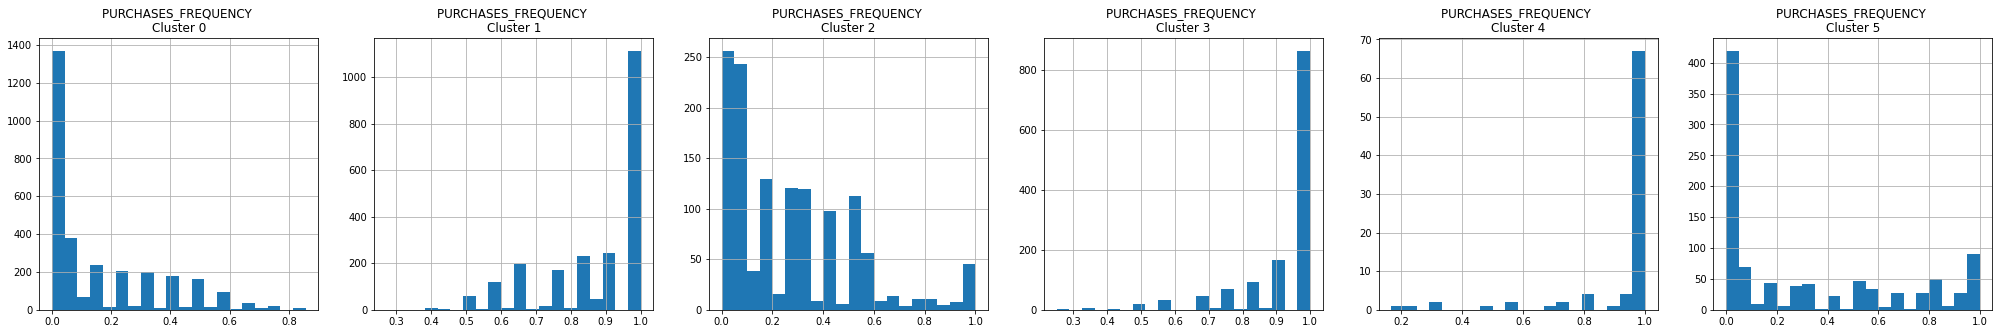

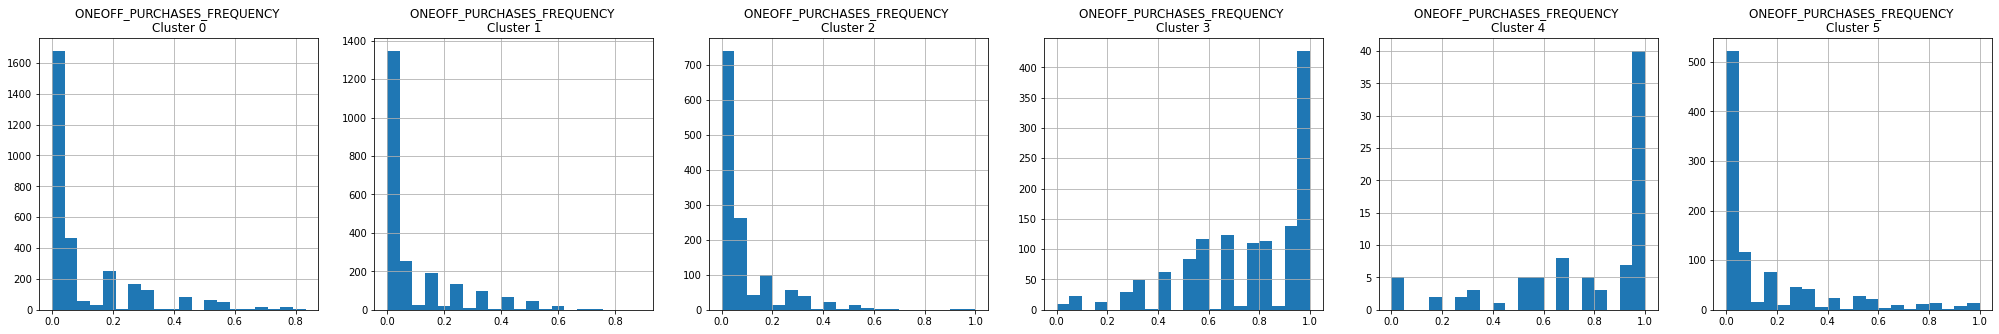

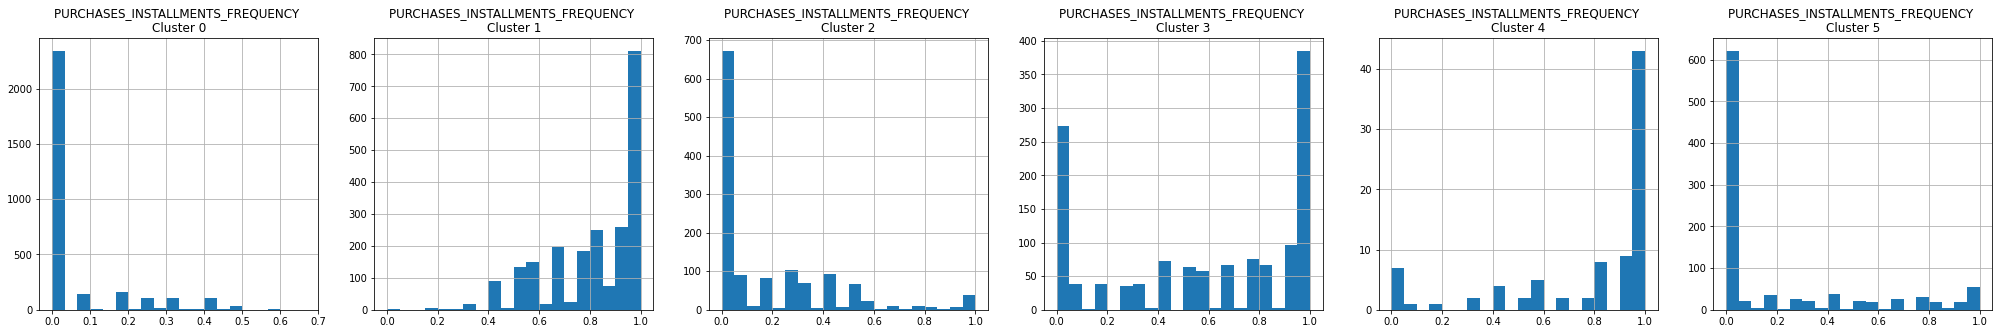

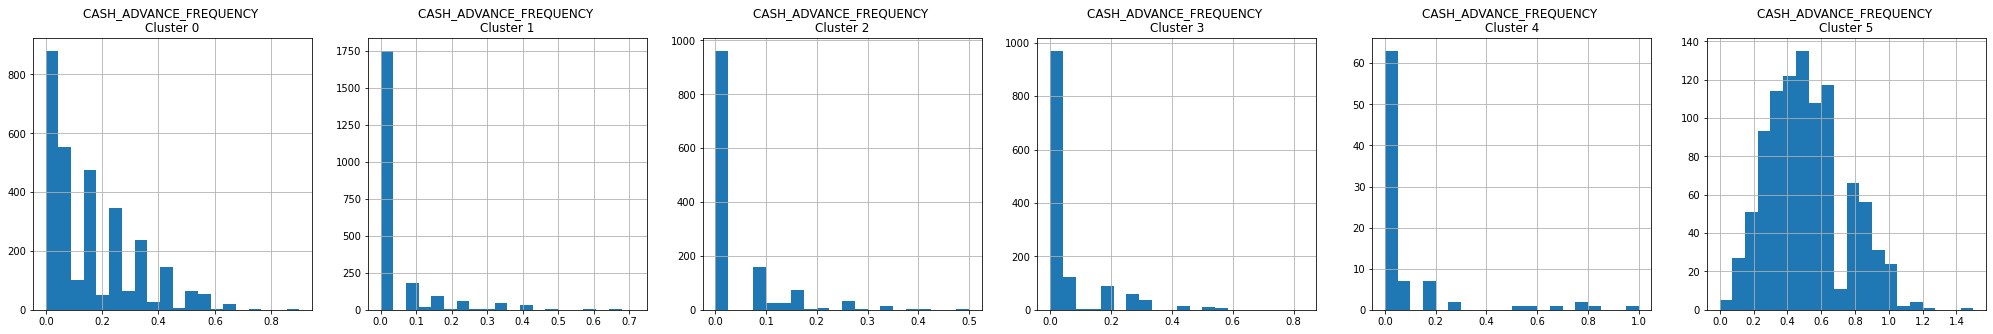

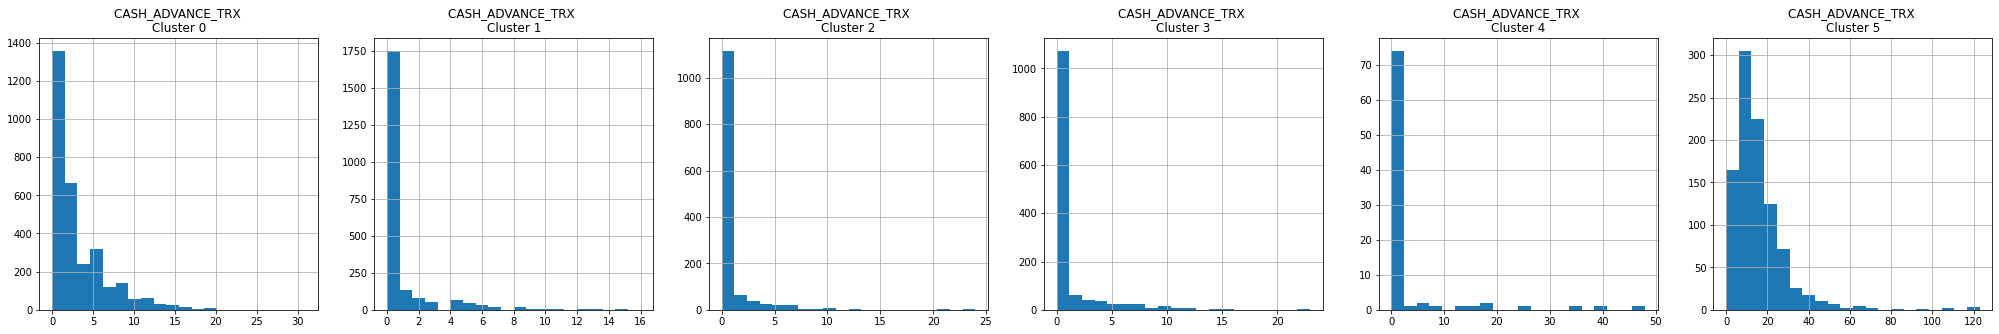

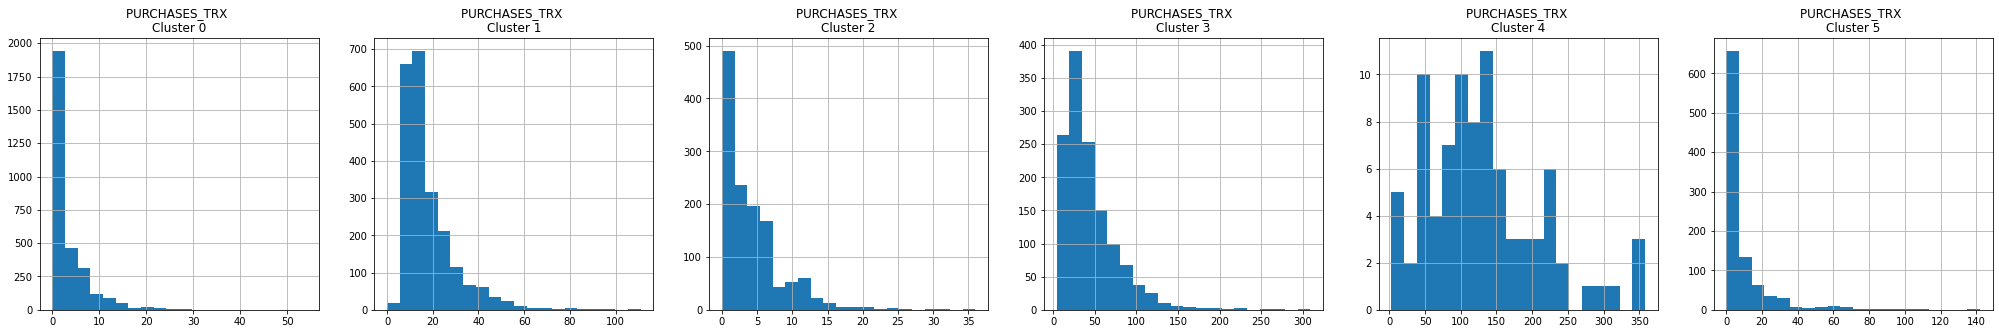

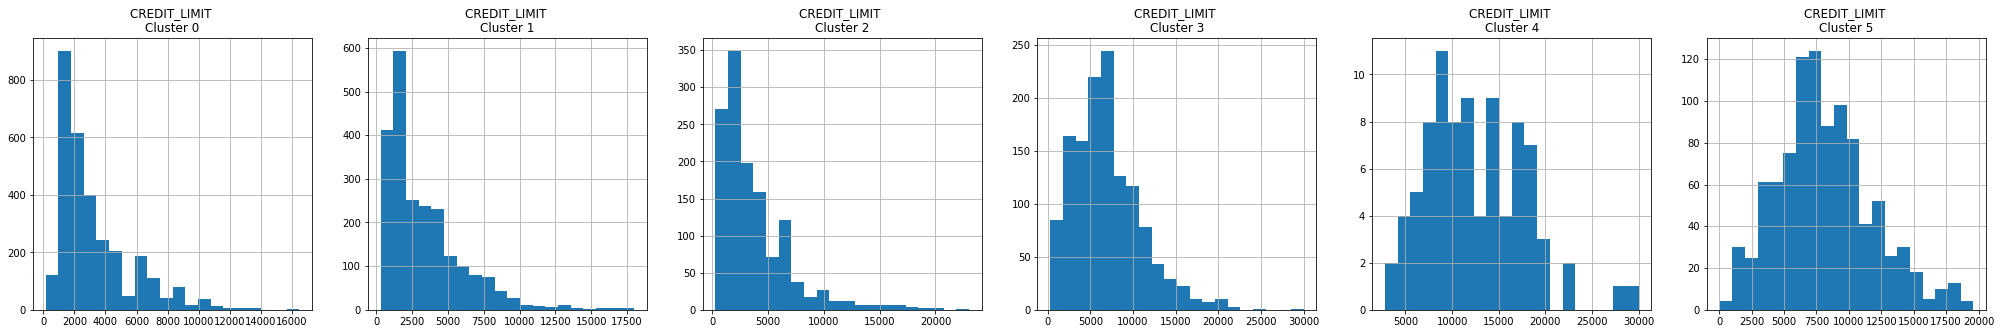

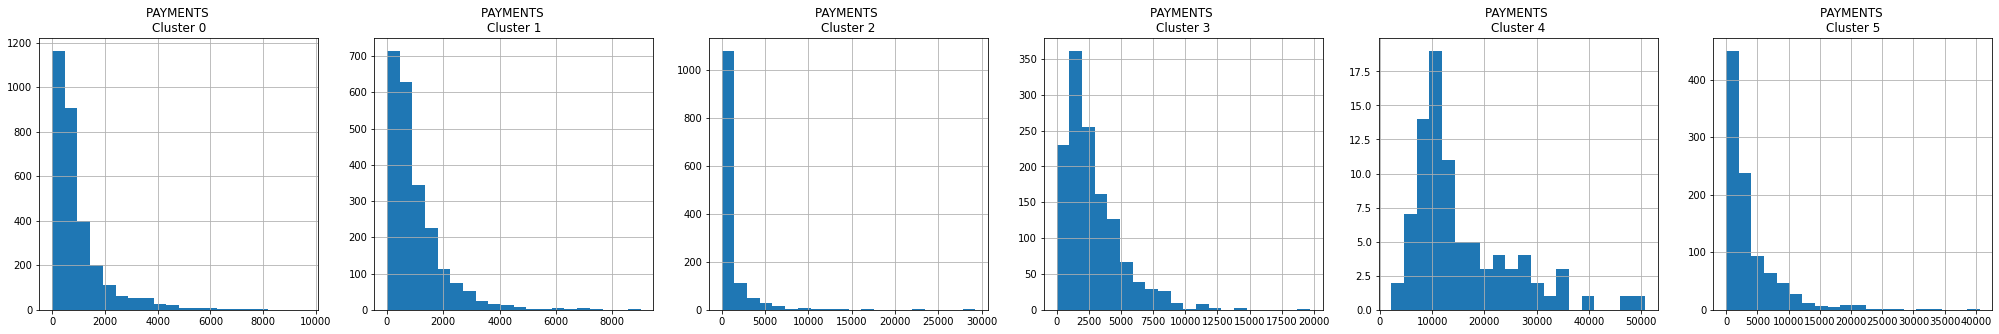

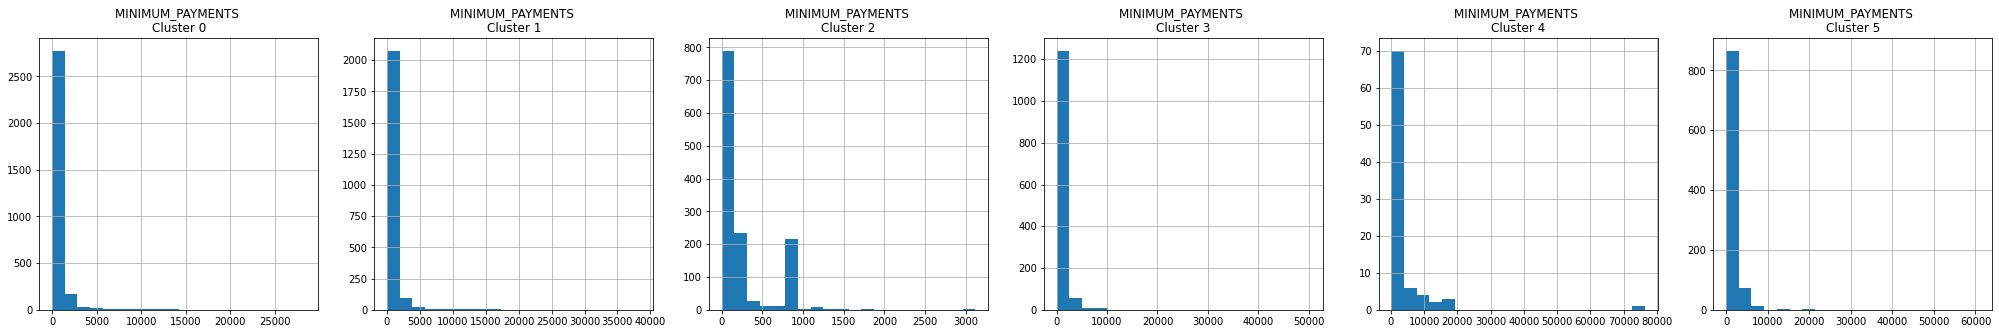

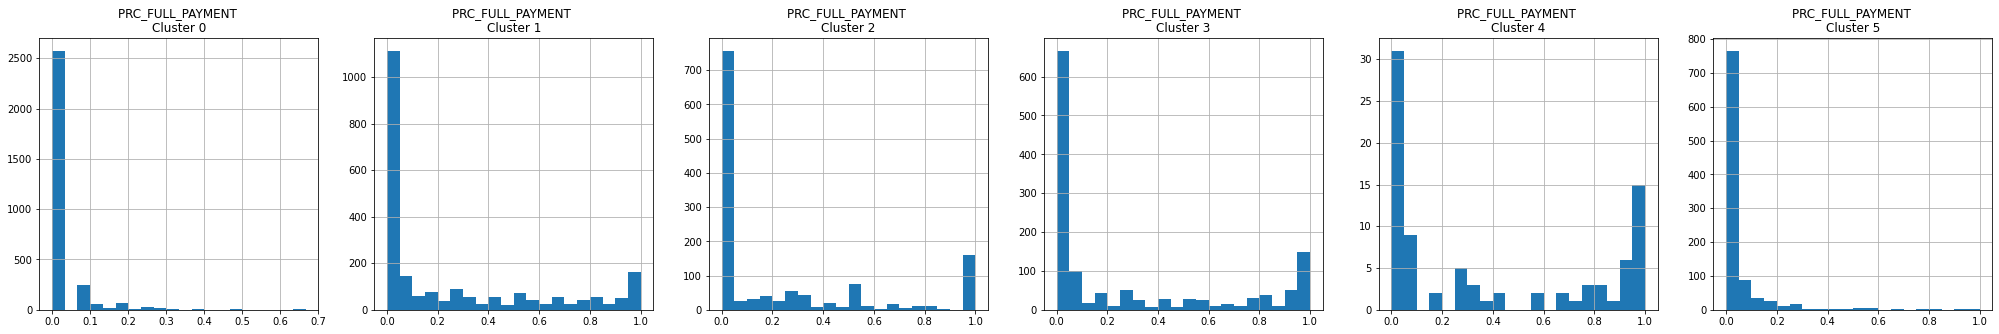

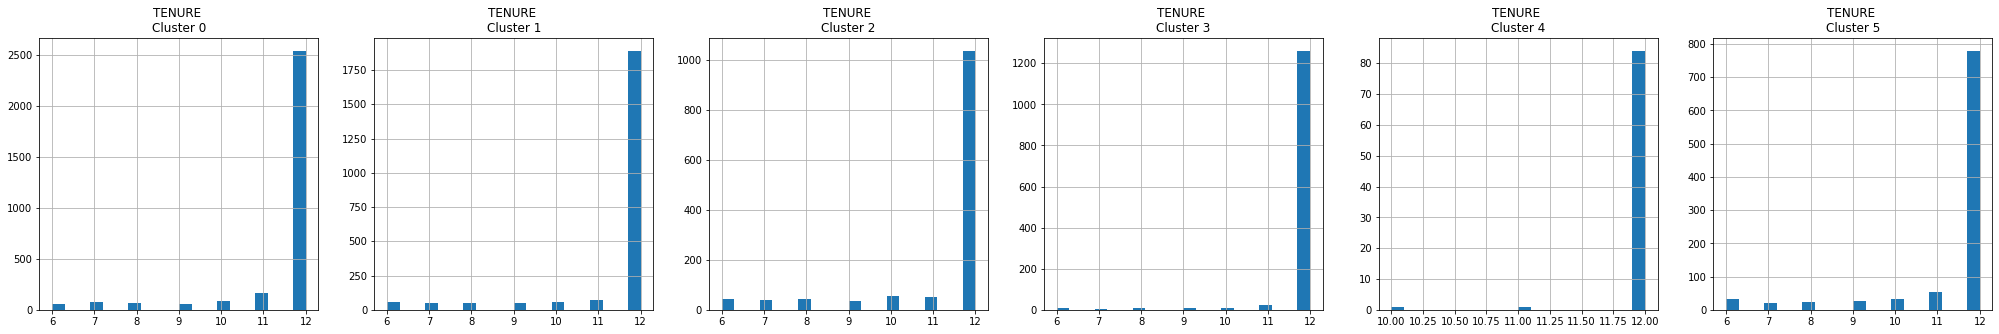

In [ ]:
for i in creditcard_df.columns:  # it selects each feature
  plt.figure(figsize=(35,5)) 
  for j in range(6):  # it selects each cluster
    plt.subplot(1, 6, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f'{i} \nCluster {j}')
  plt.show()

* **Ordering the data in relation to the cluster to send to the specific part of the company to lead with the marketing.**

In [ ]:
credit_sorted = creditcard_df_cluster.sort_values(by= 'cluster')
credit_sorted.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4445,1689.238956,1.000000,261.89,139.19,122.70,0.000000,0.416667,0.083333,0.333333,0.000000,0,7,1700.0,309.348573,1196.937133,0.000000,12,0
4447,1791.856540,1.000000,71.38,0.00,71.38,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,3000.0,547.424357,647.111708,0.000000,12,0
4449,2305.006202,1.000000,0.00,0.00,0.00,370.248624,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,624.147899,699.416582,0.000000,12,0
4450,1138.014732,1.000000,1170.48,1170.48,0.00,920.050071,0.416667,0.416667,0.000000,0.250000,4,5,4500.0,1078.964657,247.324440,0.083333,12,0


In [ ]:
credit_sorted.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6838,9321.555794,1.000000,334.90,0.0,334.90,9463.245088,1.000000,0.000000,0.916667,0.083333,5,12,10000.0,2029.431421,3506.665810,0.0,12,5
3501,9993.352521,1.000000,0.00,0.0,0.00,3299.665576,0.000000,0.000000,0.000000,0.500000,10,0,14500.0,2580.477360,2902.819273,0.0,12,5
3499,2104.961701,0.727273,4115.95,230.5,3885.45,9358.071183,0.833333,0.166667,0.666667,0.916667,20,59,8000.0,15172.585350,778.239214,0.0,12,5
4348,5259.140390,0.888889,2659.35,813.0,1846.35,4851.392018,0.888889,0.222222,0.777778,0.333333,34,38,6000.0,2249.612405,4538.542583,0.0,9,5
429,8647.057641,1.000000,0.00,0.0,0.00,5105.254316,0.000000,0.000000,0.000000,0.416667,14,0,10000.0,2052.533488,1886.223361,0.0,12,5


* **Saving the dataset as CSV to send to the marketing sector.**

In [ ]:
credit_sorted.to_csv('cluster.csv')

# **Part 4: PCA**

* **Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.**

* **PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.**

* **It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components.**

* **PCA is an algorithm unsupervised learning.**

* **The components are created by mean the characteristics without correlation.**

In [ ]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222107, -1.07645058],
       [-1.13829291,  2.50645907],
       [ 0.96970417, -0.38355484],
       ...,
       [-0.92620936, -1.81076976],
       [-2.33656469, -0.65793575],
       [-0.55642177, -0.40046376]])

* **Adding the number of the cluster of each sample**

In [ ]:
pca_df = pd.DataFrame(data= principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138293,2.506459
2,0.969704,-0.383555
3,-0.873625,0.043151
4,-1.599436,-0.688574


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076451,0
1,-1.138293,2.506459,5
2,0.969704,-0.383555,3
3,-0.873625,0.043151,0
4,-1.599436,-0.688574,0


In [ ]:
plt.figure(figsize = (10,10))
pca_df = pca_df.sort_values(by= 'cluster')
pca_df["cluster"] = pca_df["cluster"].astype(str)
fig = px.scatter(pca_df, x ='pca1', y = 'pca2',
                color=pca_df['cluster'], color_discrete_sequence = px.colors.qualitative.Dark24);
fig.show()

<Figure size 720x720 with 0 Axes>

* **In the picture above it's possible to see the groups created by the algorithm Kmeans with different colors. It is being using [plotly](https://plotly.com/python/discrete-color/)**

# **Part 5: Autoencoder**

* **An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning).**

* **The autoencoder learns a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore insignificant data (“noise”).**

* **It can replace or be used with the PCA.**

* **The input data needs to be correlated.**

* **In this project will be used the autoencoders with the PCA.**

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

> **Structure of the model**

In [ ]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17 (Dimensionality reduction)

# Encoder
input_df =  tf.keras.Input(shape=(17,))
X = tf.keras.layers.Dense(500, activation = 'relu')(input_df)
X = tf.keras.layers.Dense(2000, activation = 'relu')(X)

encoded = tf.keras.layers.Dense(10, activation = 'relu')(X)

# Decoder
X = tf.keras.layers.Dense(2000, activation = 'relu')(encoded)
X = tf.keras.layers.Dense(500, activation = 'relu')(X)

decoded = tf.keras.layers.Dense(17)(X)

In [ ]:
#autoencoder
autoencoder = tf.keras.Model(inputs = input_df, outputs = decoded)

In [ ]:
# encoder
encoder = tf.keras.Model(inputs = input_df, outputs = encoded)

In [ ]:
autoencoder.compile(optimizer= 'Adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50) # X and y are equal because it is compared them (Autoencoder)

Epoch 1/50
280/280 [==============================] - 2s 5ms/step - loss: 0.1735
Epoch 2/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0794
Epoch 3/50
280/280 [==============================] - 1s 5ms/step - loss: 0.1054
Epoch 4/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0479
Epoch 5/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0370
Epoch 6/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0332
Epoch 7/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0419
Epoch 8/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0299
Epoch 9/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0247
Epoch 10/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0200
Epoch 11/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0204
Epoch 12/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0394
Epoch 13/50
280/280 [====

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

In [ ]:
compact.shape

(8950, 10)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

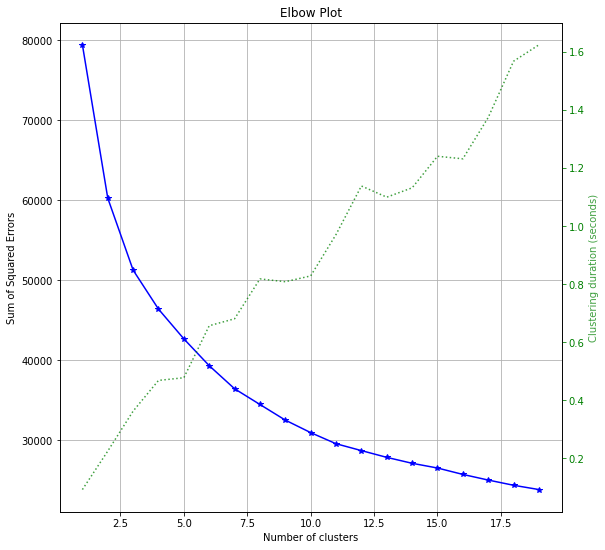

In [ ]:
kmeans = KMeans(init='k-means++', random_state = 1)
skplt.cluster.plot_elbow_curve(kmeans, X = compact, cluster_ranges=range(1, 20), figsize = (9,9));

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)
kmeans.fit(compact)
labels = kmeans.labels_

In [ ]:
np.unique(labels, return_counts= True)

(array([0, 1, 2, 3, 4], dtype=int32), array([5866, 2026,   37,  387,  634]))

* **Until here it is done the autoencoder, in other words, it was done the dimensionality reduction of the dataset. So it is not too easy to understand each feature that was found. On other hand, it was possible to find the labels for each sample of the dataset.**

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data= principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.631425,-0.018661,0
1,0.133853,-1.034353,0
2,-1.149648,0.330913,0
3,-0.397231,0.065033,0
4,-1.879247,0.065006,0


In [ ]:
plt.figure(figsize = (10,10))
pca_df = pca_df.sort_values(by= 'cluster')
pca_df["cluster"] = pca_df["cluster"].astype(str)
fig = px.scatter(pca_df, x ='pca1', y = 'pca2',
                color=pca_df['cluster'], color_discrete_sequence = px.colors.qualitative.Dark24);
fig.show()

<Figure size 720x720 with 0 Axes>

* **More consistent groups with similar characteristics.**

In [ ]:
df_cluster_at.groupby(['cluster']).describe()

BALANCE                                         ... TENURE                  
          count         mean          std          min  ...    25%   50%   75%   max
cluster                                                 ...                         
0        5866.0  1253.080118  1397.721348     0.004816  ...   12.0  12.0  12.0  12.0
1        2026.0  1264.876479  2082.262778     0.000000  ...    8.0  12.0  12.0  12.0
2          37.0  6183.804100  4555.143333  1268.809031  ...   12.0  12.0  12.0  12.0
3         387.0  5295.853454  3357.981968     0.000000  ...   11.0  12.0  12.0  12.0
4         634.0  2855.750717  2934.476551    12.659909  ...   12.0  12.0  12.0  12.0

[5 rows x 136 columns]

In [ ]:
df_cluster_at.groupby(['cluster']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1253.080118,0.948246,640.945453,347.824765,293.442110,536.437306,0.498544,0.182730,0.367312,0.093351,1.852711,11.454824,3841.134926,1048.012010,611.091208,0.133124,11.897204
1,1264.876479,0.626930,449.808233,266.466802,183.429867,1286.712498,0.337307,0.112125,0.231179,0.191308,4.306515,5.638697,4182.811010,1458.870195,730.554493,0.180656,10.365252
2,6183.804100,0.957985,21944.206757,14847.708108,7096.498649,1700.664783,0.902703,0.668018,0.773874,0.099099,3.972973,130.756757,15800.000000,23619.948946,5679.944442,0.415248,11.945946
3,5295.853454,0.928847,1025.052403,560.731886,464.377364,6591.020195,0.374502,0.179185,0.277200,0.557169,20.925065,14.100775,8633.333333,6910.614082,4286.629504,0.070037,11.046512
4,2855.750717,0.984371,4887.941356,3084.770063,1804.117666,620.861646,0.950254,0.660684,0.793030,0.086850,1.954259,67.413249,8348.817035,4511.013012,1263.092375,0.293943,11.946372


---

* **Group 0: Standard customer**
  * **They have the lower Balance. Looking for the quartiles it's possible to see this too.**
  * **The frequently the Balance is updated is 94.8246 %.**
  * **This is the Group that has more people from the dataset, so the bank has to pay more attention with this ones by creating a good marketing.**
  * **As they are in a bigger number of people, if they are satisfied with the service offered by the bank, they can indicate more people to contract this company.  In other words, the number of clients of the bank will increase.**
  * **The cash in advance given by the user is lower compared with the other groups (536.437306).**


* **Group 1: Careful users**
  * **This group has the lowest balance amount left in their account to make a purchase: 1264.876479.**
  * **Analyzing the quartiles of the BALANCE, Group 1 has the lowest Q1, Q2, and Q3. (You can read more about it below).**
  * **The PRC_FULL_PAYMENT is 18.0656 % which is higher than the dataset that is 15.3715 %.**
  * **Probably this group keeps their money invested somewhere.**
  * **The bank should open offers to these clients to invest their money using the bank as an investment broker.** 
  * **This group has the lowest ONEOFF_PURCHASES and	INSTALLMENTS_PURCHASE.**
  * **The lowests PURCHASES_FREQUENCY,	ONEOFF_PURCHASES_FREQUENCY, and	PURCHASES_INSTALLMENTS_FREQUENCY are from this group.**

* **Group 2: VIP or Premium**
  * **This is a group of clients that has the highest credit limit: 15800.000000.**
  * **Analyzing the quartiles of the CREDIT_LIMIT, Group 1 has the highest Q1, Q2, and Q3. (You can read more about it below).**
  * **Besides, it has the highest Percent of full payment paid by users: 41.5248 %. The means of the PRC_FULL_PAYMENT from the dataset is 15.3715 %.**
  * **The bank should increase the limit card and incentive the habit of shopping for this group of clients.**
  * **There are just 37 people in this group from the whole dataset.**
  * **This group has the highest ONEOFF_PURCHASES and	INSTALLMENTS_PURCHASE.**
  

* **Group 3: More profitable for the bank**
  * **This is a group that has the higher Cash in advance given by the user: 6591.020195.**
  * **This is a group more profitable because the bank because the bank profits a lot from the interest from the advance.**
  * **They have a balance of 5295.853454	in their account.**
  * **This group has a low PURCHASE_FREQUENCY: 37.4502 %.**
  * **They have the lower percent of full payment paid by users (7.0037	 %), due to this it is a risk group for the bank because they didn't pay often their debts.**
  * **This is the group that most people use their CASH_ADVANCE_FREQUENCY: 55.7169 %.**
  * **Due to growing debts and little money, they may not have enough money to pay off the debts.**


* **Group 4:**
  * **This group has the highest BALANCE_FREQUENCY: 98.4371 %.**
  * **This is the second group that has the highest amount of purchases made from the account: 4887.941356.**
  * **This is the second group that has the highest ONEOFF_PURCHASES and	INSTALLMENTS_PURCHASES.**
  * **This group has a low CASH_ADVANCE: 620.861646**
  * **They have the highest purchase frequency 95.0254 %.**


* *What does quartile mean?*

  A quartile divides data into three points—a lower quartile, median, and upper quartile—to form four groups of the dataset. The lower quartile, or first quartile, is denoted as Q1 and is the middle number that falls between the smallest value of the dataset and the median. The second quartile, Q2, is also the median. The upper or third quartile, denoted as Q3, is the central point that lies between the median and the highest number of the distribution.
---
<br>

> **Saving the dataset with the cluster of each client to send to the department of marketing.**

In [ ]:
df_cluster_at.to_csv('cluster.csv')

# **Part 6: Conclusions of the project**

One way to identify the clients and their needs is by applying techniques of unsupervised learning. This is a fictional dataset given by Arjun Bhasin. The dataset can be found at the site of Kaggle: [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata). 


In this first part, it is imported the libraries and frameworks that are used during this project. Also, it is displayed the data and some characteristics of it, like the number of samples and features, if exist null or NaN values in the dataset, and counts the unique values for each feature. There are 313 null values in the feature MINIMUM_PAYMENTS and 1 in the CREDIT_LIMIT. They are filled with the mean value of the feature that they belong to.

In the second part, some graphics are made to visualize the dataset for some insights about the problem, for example, the correlation between the features. Besides, some features that aren't necessary are withdrawn. Here is withdraw the following features that are useless for the project: ''CUST_ID''.

In the third part, it is Standardize features by removing the mean and scaling to unit variance using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). After that, is build a graphic to use the elbow method, so in this figure is possible to see that the better number of clusters is 6. Afterward, is applied the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find the groups in the dataset of the clients that have the same characteristics. Then, is displayed some graphics of each group to take some insights. Finally, it generates a file CSV that is sent to the marketing sector.

Then, it is implemented the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) that is is the process of computing the principal components and using them to perform a change of basis on the dataset.Here is plotted a graphic with 2 axis that is easier to see the clusters. It isn't so simple to identify a specific difference between the group of cluster 0 from groups 0 and 5. Also, it is not possible to see the difference between the group of cluster 4 from groups 5 and 3.

In the last part of the project is done the AutoEncoder that is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). This model learns a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore insignificant data (“noise”). Here it is used the [Tensorflow with the Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Model) to build this neural network. It can replace the PCA, but in this project, they are used together.  This model takes the data after the encoding process and applies the elbow method to build the K-means with 5 clusters. Finally, is applied the PCA to see the graphics of the groups made and analyze some characteristics of each group.  So, it's possible to see that the groups have different characteristics of each other, making it easier to know the needs of each client, help the sector of marketing to take actions that can result in a better profit for the bank or even bring new clients. 

# **Part 7: Author**
* Author: [Luís Fernando Matias de Farias](https://www.linkedin.com/in/lu%C3%ADs-fernando-matias-de-farias-52234b20a/?locale=en_US)
